# Task 5 (Exploratory Data Analysis - Sports(The Indian Premier League))

# created by : Dief Mohamed

**used tool : python**

 - find out the most successfull **teams** , **players** and **factors contributing win or loss of a team**.
 - suggest **teams** or **players** a **company** should endorse for its products
 - Dataset : remote link is ["https://bit.ly/34SRn3b"]
 
 # The dataset has 18 columns. Let’s get acquainted with the columns.
 
 # The description of the dataset on kaggle

- **id**: The IPL match id.
- **season**: The IPL season
- **city**: The city where the IPL match was held.
- **date**: The date on which the match was held.
- **team1**: One of the teams of the IPL match
- **team2**: The other team of the IPL match
- **toss_winner**: The team that won the toss
- **toss_decision**: The decision taken by the team that won the toss to ‘bat’ or ‘field’
- **result**: The result(‘normal’, ‘tie’, ‘no result’) of the match.
- **dl_applied**: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
- **winner**: The winner of the match.
- **winbyruns**: Provides the runs by which the team batting first won
- **winbyruns**: Provides the number of wickets by which the team batting second won.
- **playerofmatch**: The outstanding player of the match.
- **venue**: The venue where the match was hosted.
- **umpire1**: One of the two on-field umpires who officiate the match.
- **umpire2**: One of the two on-field umpires who officiate the match.
- **umpire3**: The off-field umpire who officiates the match

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

C:\Users\dell\Anaconda31\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df1 = pd.read_csv("deliveries.csv" )
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
df = pd.read_csv("matches.csv" )
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
df.shape

(756, 18)

In [6]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
#from the previus step we find that the 
#comlumn : umpirer3 contain a huage number of null data so we drope it 
df.drop(["umpire3"],axis = 1, inplace = True)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [8]:
df.describe(include = "all")

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65
top,NaN,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

first we should know,How many matches are winned in each IPL season?
so we need apply groupby() method on "season" column , and apply value_counts() on "Winner" column 
to count the number of matches that are winned.

In [10]:
winer_team_per_season = df.groupby("season")["winner"].value_counts()
winer_team_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

know we will visualize this maches that winned in each IPL season using seaborn countplot()

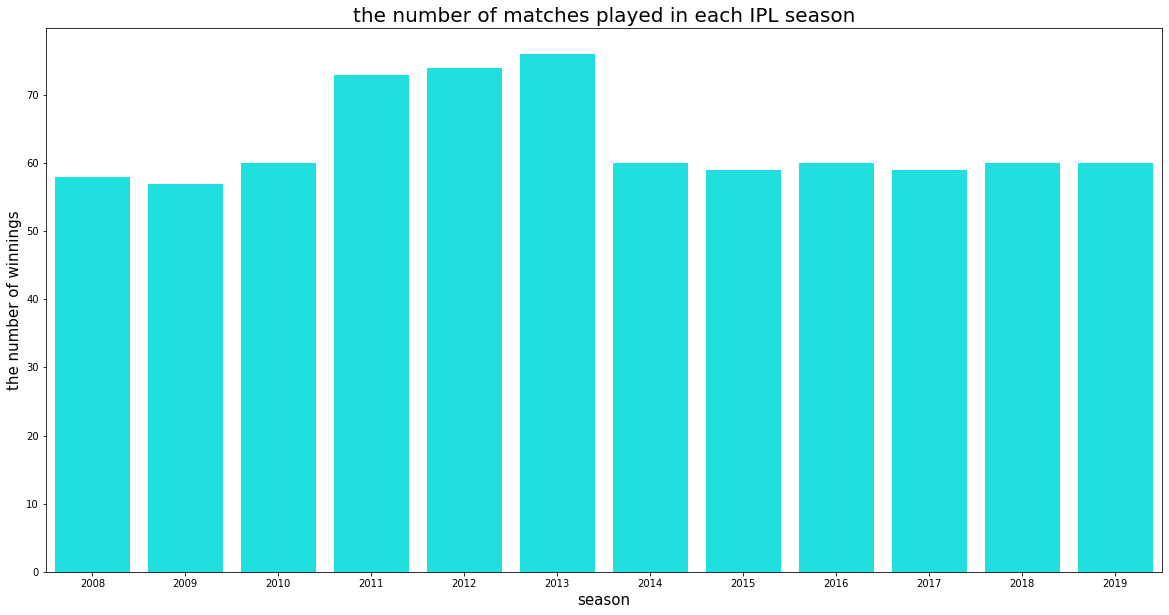

In [11]:
plt.figure(figsize = (20,10))
sns.countplot(df["season"] , data = df , color = "Cyan" )
plt.xlabel("season" ,fontsize = 15 )
plt.ylabel("the number of winnings" , fontsize = 15)
plt.title("the number of matches played in each IPL season" , fontsize = 20)
plt.show()

# Note 1 : - The highest number of matches played in IPL season were in 2011, 2012 , 2013
     
     

after visualizing the number of matches played in each season.

now we need to know the number of matches won  by each team.


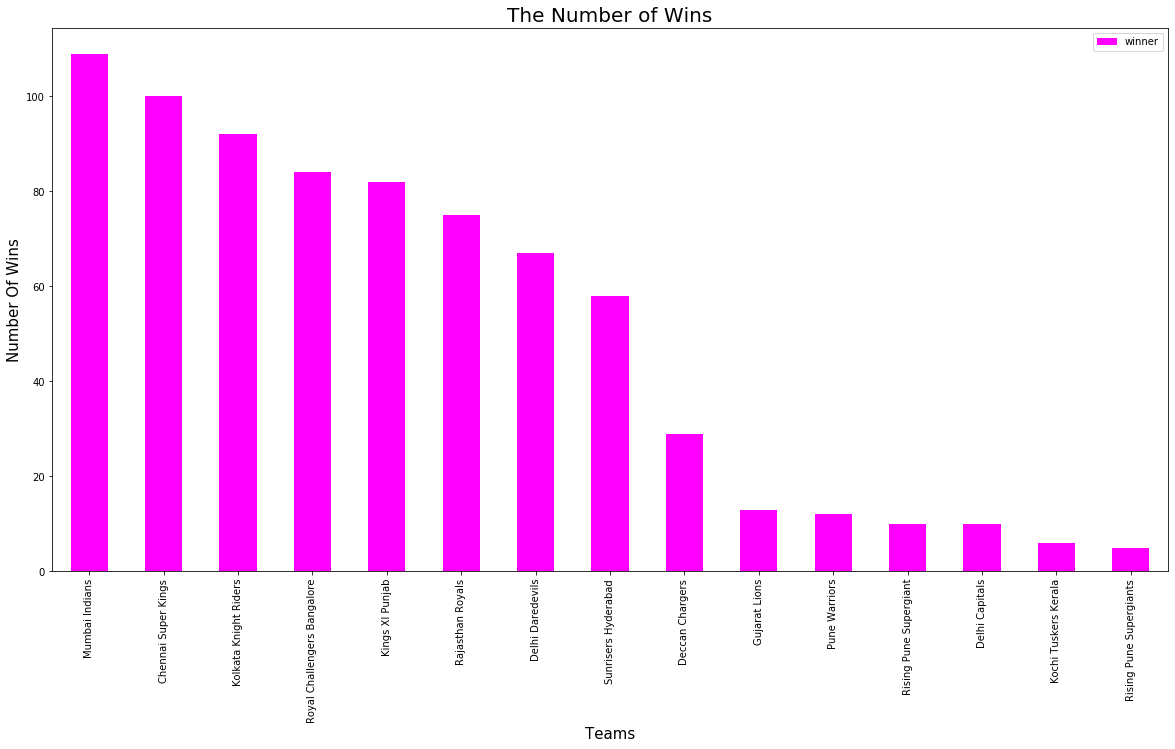

In [12]:
df['winner'].value_counts().to_frame().sort_values('winner',axis=0,ascending=False).head(15).plot(kind='bar',figsize=(20,10),color='Magenta')
plt.title("The Number of Wins",fontsize=20)
plt.xlabel("Teams" ,fontsize=15)
plt.ylabel("Number Of Wins",fontsize=15)
plt.show()

# Note 2 : - The highest number of match won by Mumbai Indians.
    

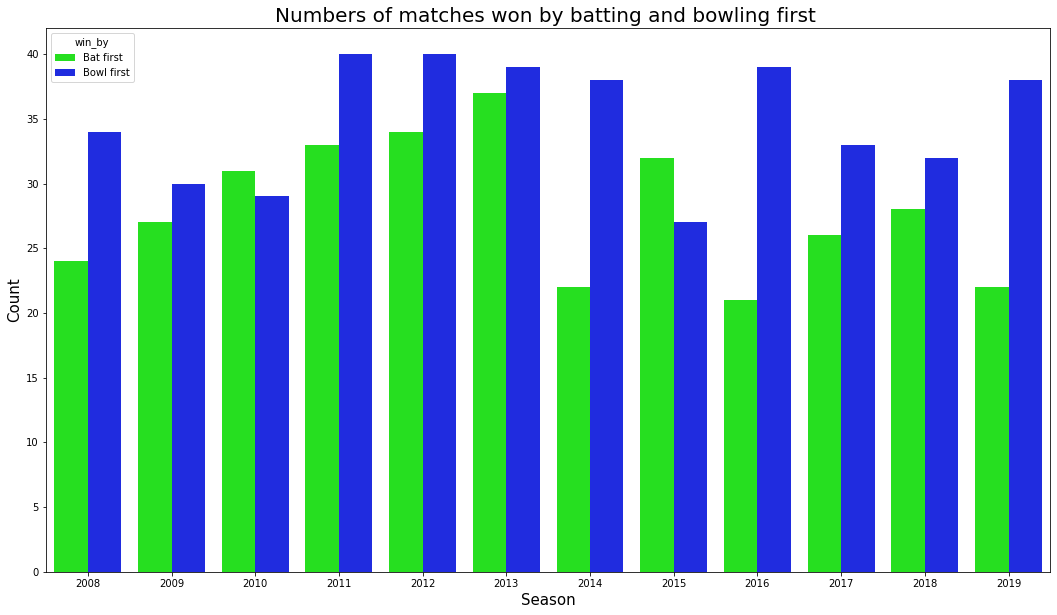

In [15]:
df['win_by']=np.where(df["win_by_runs"]>0,'Bat first','Bowl first')

plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=df,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

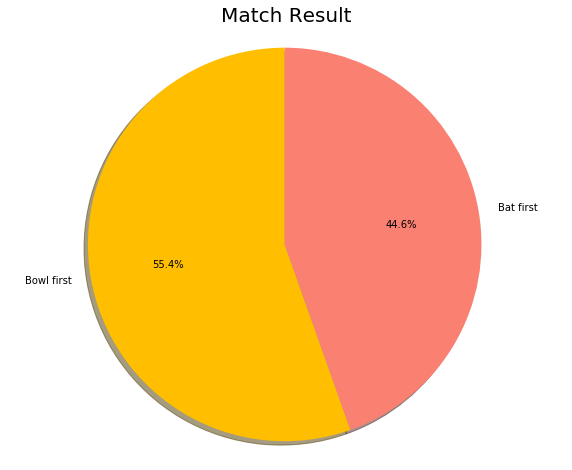

In [16]:
Win=df.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

# Note 3 : Teams which Bowl first has higher chances of winning then the team which bat first.

lets know the Number of matches won by Toss result.

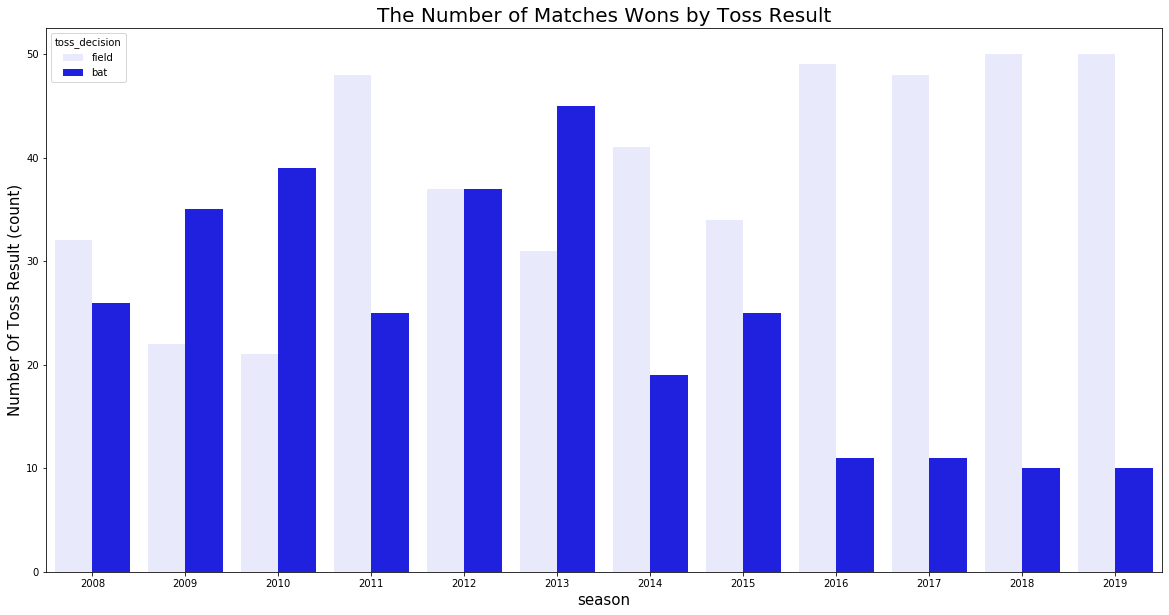

In [17]:
#visualize the Number of matches won by Toss result
plt.figure(figsize = (20,10))
sns.countplot(df["season"] , hue = "toss_decision" , data = df , color = "blue")
plt.title("The Number of Matches Wons by Toss Result",fontsize=20)
plt.xlabel("season" ,fontsize=15)
plt.ylabel("Number Of Toss Result (count)",fontsize=15)
plt.show()

lets know the percentage Toss Result using by pie chart.

**label**: This parameter is the sequence of strings providing the labels for each wedge.

**sizes** : the wedge sizes

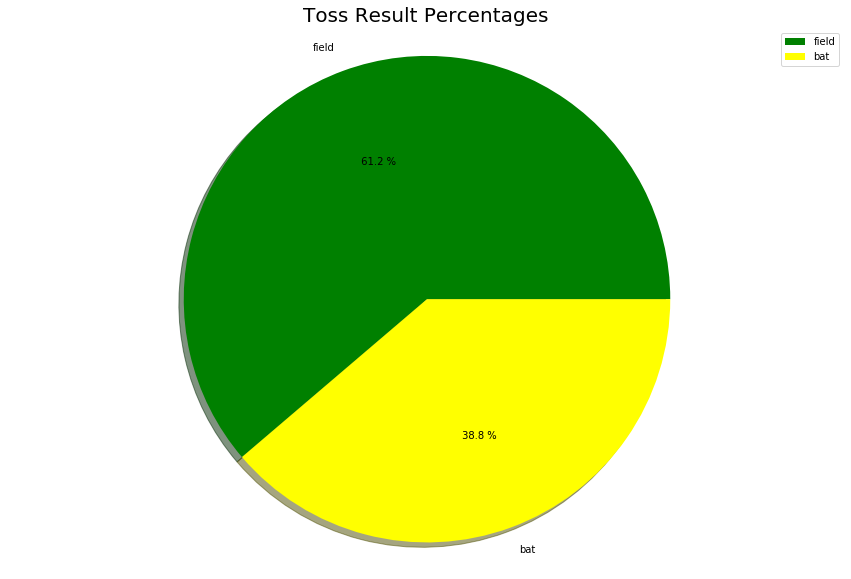

In [18]:
num_toss = df["toss_decision"].value_counts()
labels = np.array(num_toss.index)
sizes = num_toss.values
plt.figure(figsize = (15,10))
plt.pie(sizes , labels = labels , autopct ='% 1.1f %%' , shadow = True, colors = ["green" , "yellow"])
plt.title("Toss Result Percentages" , fontsize = 20)
plt.axis("equal" , fontsize = 20)
plt.legend()
plt.show()


**field percentage** = 61.2%

**bat percentage** = 38.8%




# Note 4 : After winning toss more teams decide to do fielding first. 

In [19]:
#print winner in each season
#if we print the df[['season','winner']].reset_index(drop=True).sort_values('season') we will 
#find out that there are many duplicated columns so first we should drop the duplicates

final_matches = df.drop_duplicates(subset = ["season"] , keep = "last")
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')


,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


 now lets plot pie chart based on the Winning percentage in the final matches

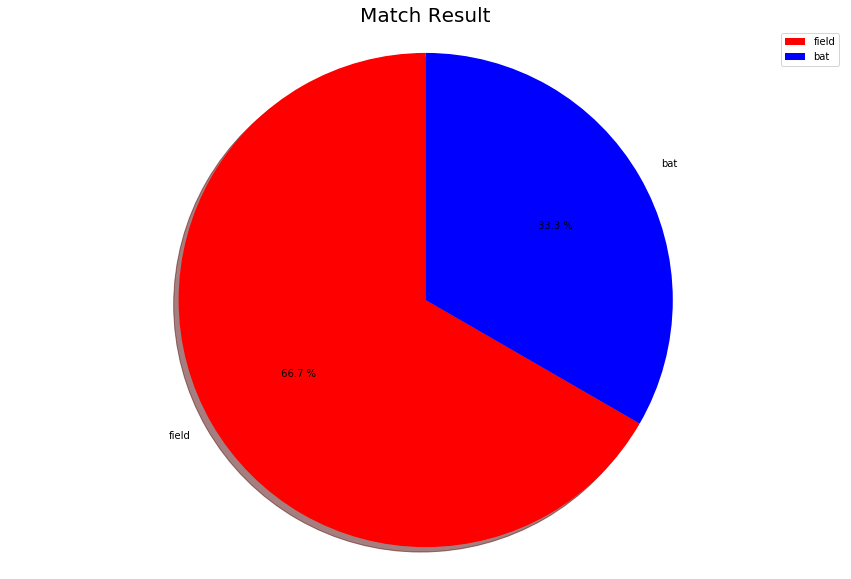

In [20]:
final = final_matches['win_by'].value_counts()
labels = np.array(num_toss.index)
sizes = final.values
plt.figure(figsize=(15,10))
plt.pie(sizes , labels = labels , autopct ='% 1.1f %%',
        shadow = True, startangle = 90 , colors = ["red" , "blue"])
plt.title("Match Result" , fontsize = 20)
plt.axis("equal" , fontsize = 20)
plt.legend()
plt.show()

# Note 5 : In the final_matches team which decide to do fielding first win the matches more then the team which bat first.

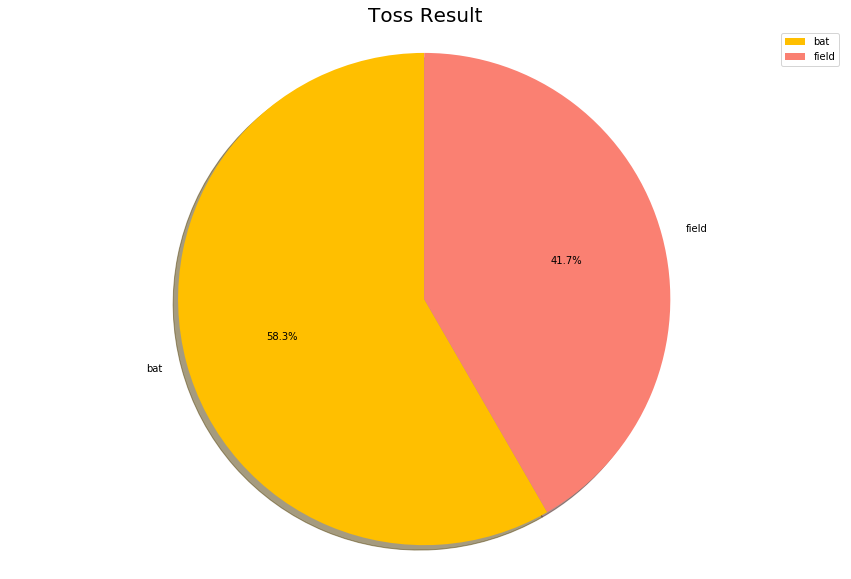

In [21]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (15,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.legend()
plt.show()

lets know the name of the 10 top player. 

In [22]:
df["player_of_match"].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

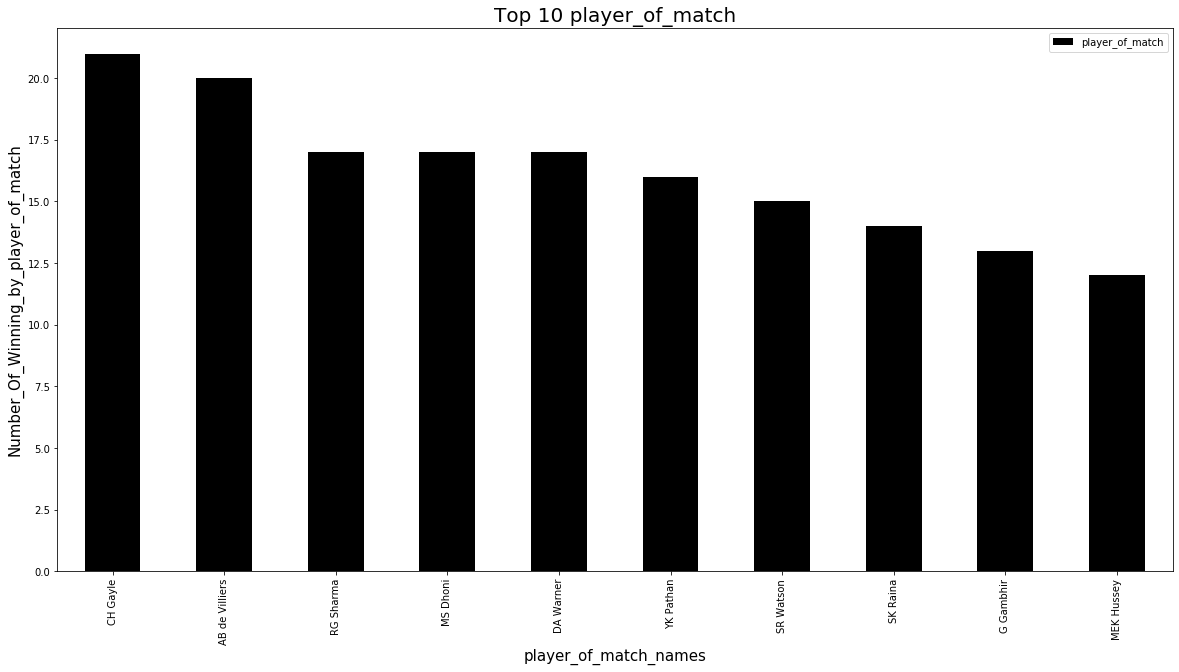

In [23]:
df['player_of_match'].value_counts().to_frame().sort_values('player_of_match',axis=0,
             ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='Black')

plt.title("Top 10 player_of_match",fontsize=20)
plt.xlabel("player_of_match_names" ,fontsize=15)
plt.ylabel("Number_Of_Winning_by_player_of_match",fontsize=15)
plt.legend()
plt.show()

# Note 6 : The Top player of match winning is CH gayle.

 We need know city and the winner in this city size.

In [24]:
final_matches.groupby(["city" , "winner"]).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [25]:
#lets know the number of times of winning the team in the final_matches
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

# Note 7 : The highest number of final_matches won by Mumbai Indians ( 4 match out of 12 matches).

In [26]:
#show the number of final matches
len(final_matches)

12

In [27]:
 # we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [28]:
#lets print man of the match in the final_maches
final_matches[["winner" , "player_of_match"]].reset_index(drop = True)


,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [29]:
#show the number of times the "toss_winner" in the final_matches
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])


9

# Note 8 : It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL

In [30]:
# We will print the top 10 leading run scorer in IPL
batsman_score=df1.groupby("batsman")['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


# Note 9 : Top leading run scorer in IPL are V kholi, SK Raina.

In [31]:
# we will print no of matches played by batsman
No_Matches_player= df1[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


# Note 10 : The highest number of matches played by player name are SK Raina.

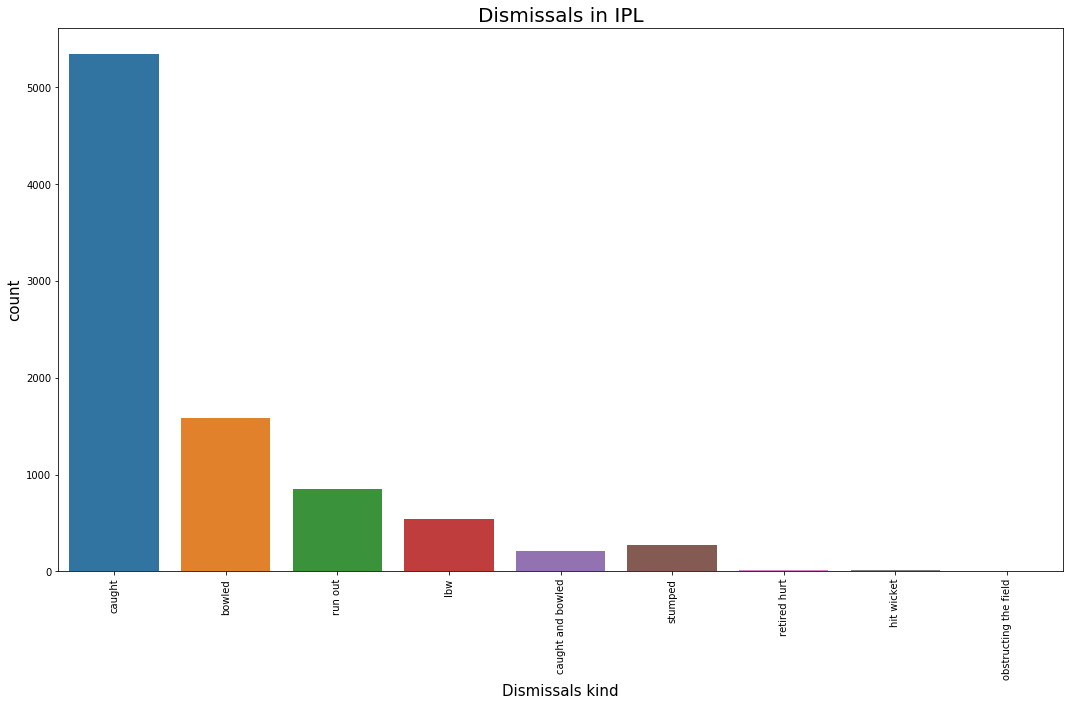

In [32]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(df1.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [33]:
wicket_data=df1.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [34]:
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


# Note 11 :

      - Dismissals in IPL was most by Caught .
 
      - The IPL most wicket taken blower is SL Malinga.

# Conclusion :
 
    -The Most Successful 4 Teams are --> [Mumbai Indians , Chennai Super Kings ,Kolkata Knight Riders,Royal Challengers Bangalore]
    
    - the most successful5  players are --> [CH Gayle,AB de Villiers,RG Sharma,MS Dhoni ,DA Warner ]
    
    - the most successful factors contributing the win or loss of a team are -->>{win_by_runs['Bat first' or 'Bowl first'] , toss_decision [ "field" or "bat"] }
    
    - I suggest the most 4 teams and the most 5 players a company should endorse for its products 

# Thank You.